In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
import warnings

warnings.filterwarnings('ignore')

# THIẾT LẬP MÔI TRƯỜNG

In [9]:
import time

import numpy as np

import pandas as pd

import seaborn as sns

from statistics import mean 

import matplotlib.pyplot as plt

In [10]:
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.ensemble import AdaBoostClassifier

In [11]:
pd.options.display.float_format = '{:.2f}'.format

# DATA

## 1.Dataset info

In [12]:
data = pd.read_csv('heart.csv')

In [13]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.20,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.40,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.20,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.00,Flat,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [15]:
# Xác định kiểu dữ liệu của từng thuộc tính: Categorical, Numerical

categorical_features = []
numerical_features = []

for i in list(data.columns):
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',categorical_features)
print('Numerical Features :',numerical_features)

Categorical Features : ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numerical Features : ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


Nhận xét: (<b>Comment 1, 2</b>)

* Data không có dữ liệu bị thiếu (Null, NaN).
* Data có 12 features, trong đó 5 features là categorical, 7 là numerical.

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


## 2.Data analysis

### 2.1. Encode các features từ string thành số.

In [17]:
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

In [18]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.20,1,1
914,68,1,0,144,193,1,1,141,0,3.40,1,1
915,57,1,0,130,131,0,1,115,1,1.20,1,1
916,57,0,1,130,236,0,0,174,0,0.00,1,1


### 2.2. Visualize phân phối của từng features

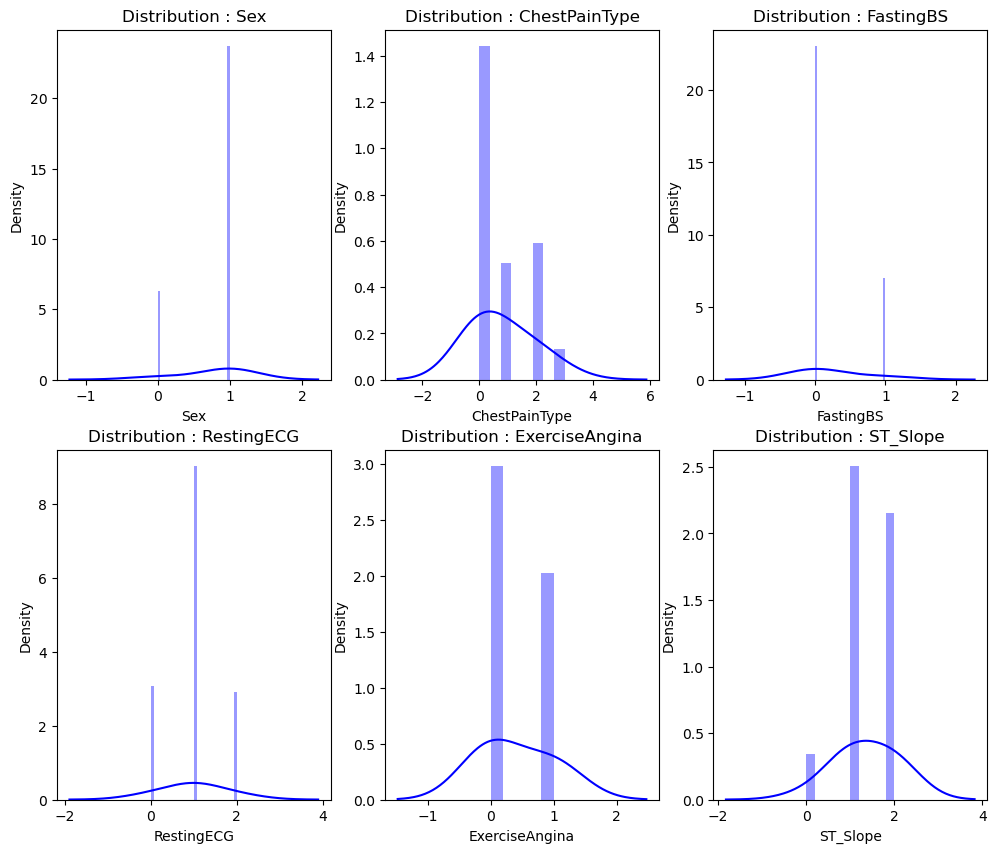

In [19]:
# categorical features
fig, ax = plt.subplots(nrows = 2,ncols = 3,figsize = (12, 10))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(2,3,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = 'blue')
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title);

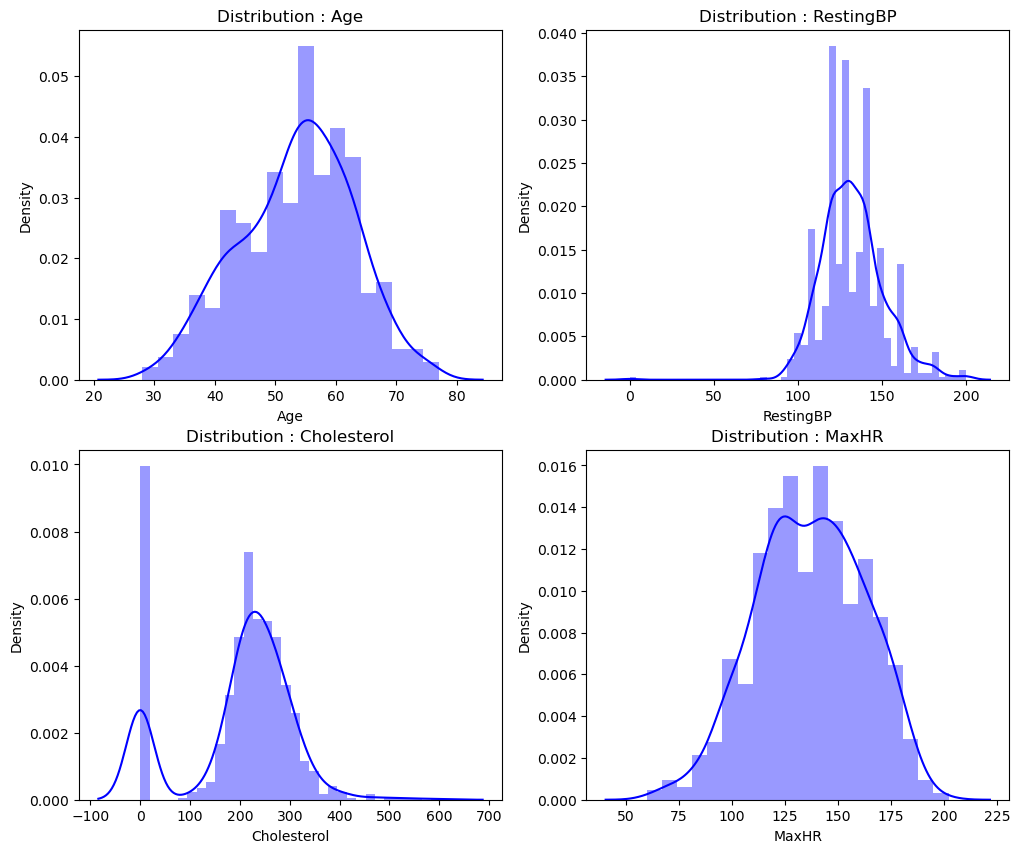

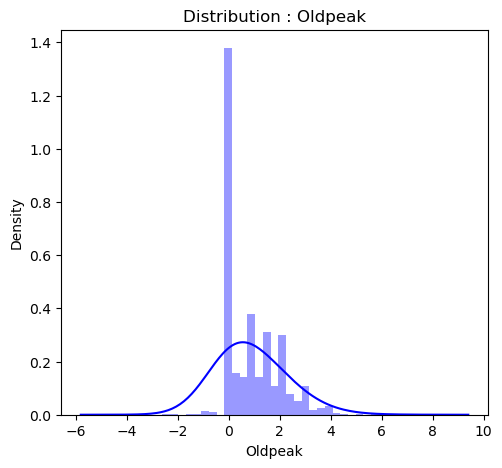

In [20]:
# numerical features
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (12, 10))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],color = 'blue')
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (5.5, 5))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = 'blue')
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

Text(0.5, 1.0, 'Distribution : HeartDisease')

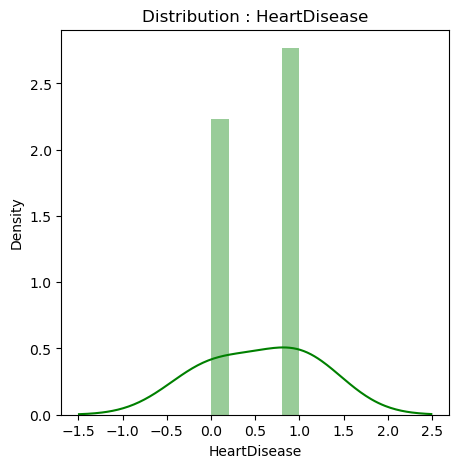

In [21]:
# label
plt.figure(figsize = (5,5))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = 'green')
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title)

Nhận xét: (<b>Comment 3</b>)

* Các features numerical: Age, RestingPB, MaxHR có phân phối gần giông với phân phối chuẩn.
* Cholesterol bị nhiễu ở cholesterol = 0 nên không tuân theo phân phối chuẩn. Có thể ta sẽ remove phần nhiễu đó để cholesterol tuân theo PPC.

In [22]:
data["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

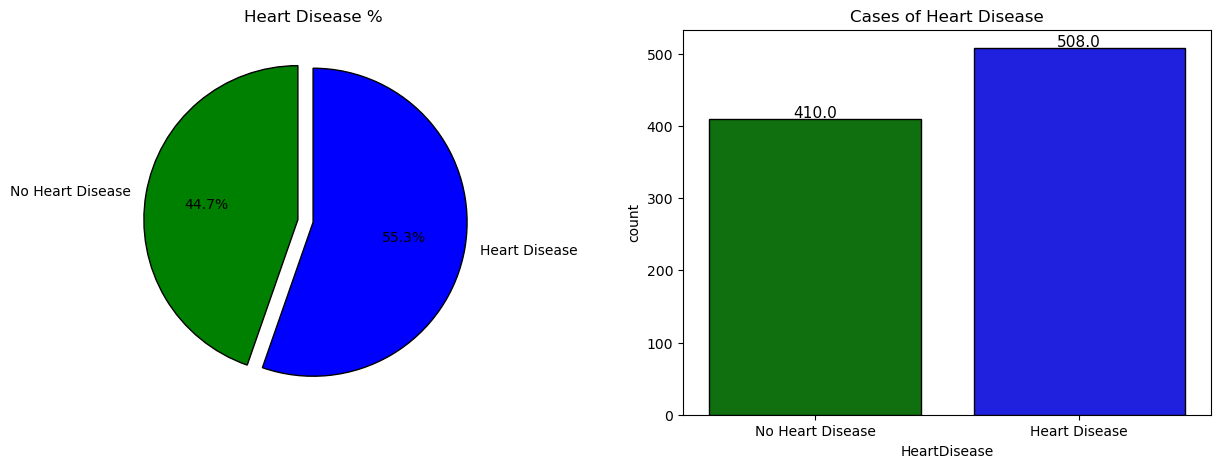

In [23]:
# Output features
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]
colors = ['green', 'blue']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot(x = data['HeartDisease'], palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show()

<b>Comment 4</b>: Data của 2 class cần phân loại cân bằng.

### 2.3. Phân tích mối liên hệ giữa các đặc trưng categorical với output(bệnh tim mạch)

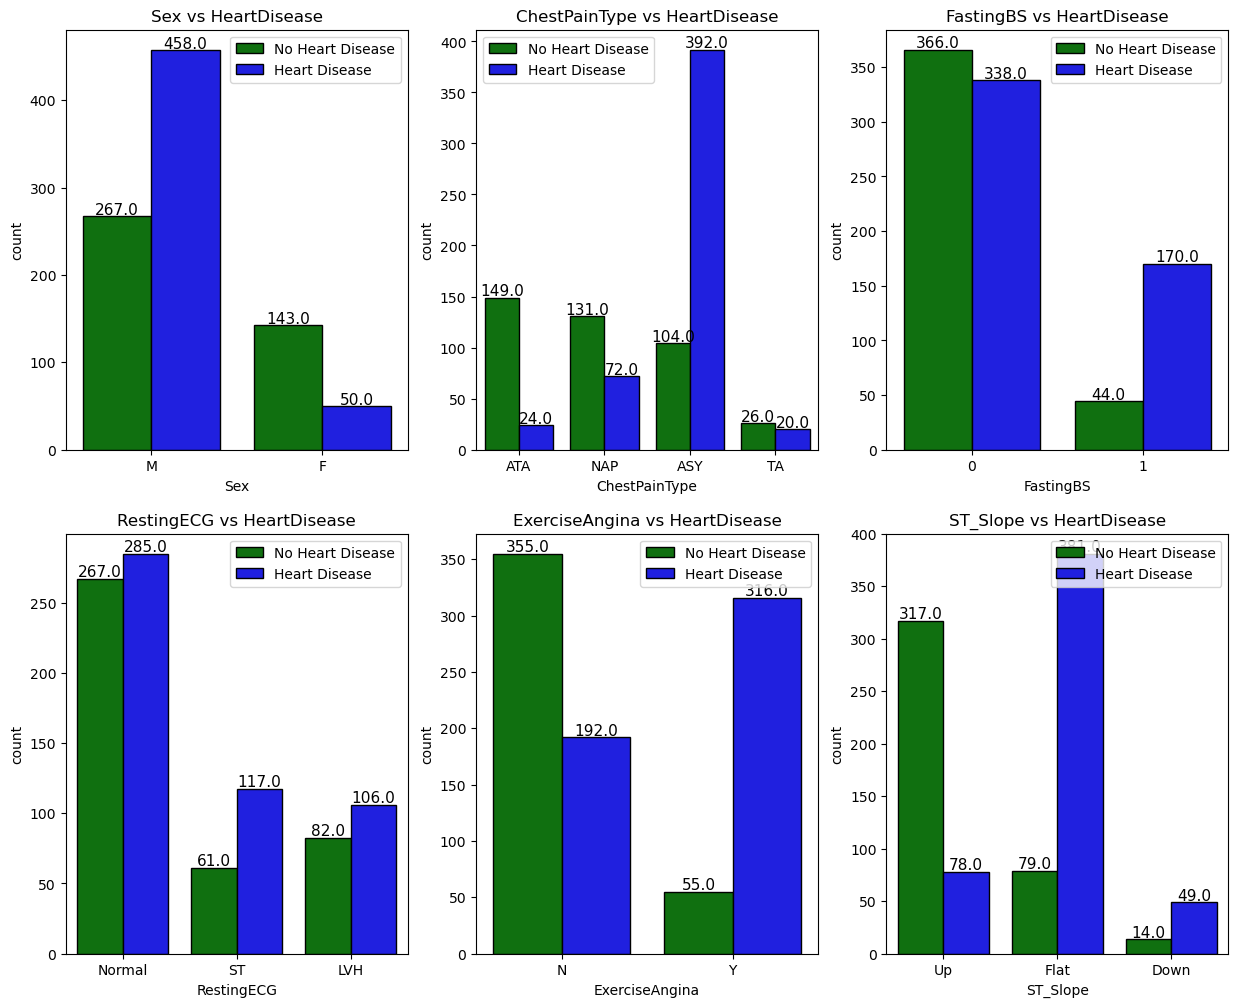

In [24]:
fig, ax = plt.subplots(nrows = 2,ncols = 3,figsize = (15, 12))
for i in range(len(categorical_features) - 1):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(x=categorical_features[i],data = data,hue = "HeartDisease",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

Nhận xét: 

* Người nam dễ bị bệnh tim mạch hơn là người nữ. Tỉ lệ bệnh ở nam là 458/(458 + 267) = 63%, trong khi đó ở nữ là 50/(50 + 143) = 26%.

* Người thuộc loại ASY trong features chestpaintype dễ bị bệnh hơn so với phần còn lại với tỉ lệ 392/(392 + 104) = 79%.

* Nếu một người được chuẩn đoán mắc bệnh Fasting Blood Sugar thì có tới 170/(170 + 44) = 79% khả năng mắc thêm bệnh tim mạch. Nhưng nếu không mắc bệnh Fasting Blood Sugar thì xác suất bệnh tim mạch vẫn là khoảng 50%. Do đó, Fasting Blood Sugar vẫn có thể dùng để phân loại tim mạch, nhưng nó không phải là đặc trưng quá tốt.

* RestingECG không giúp phân tách các trường hợp bệnh tim mạch tốt. Do với mỗi trường hợp trong RestingECG, tỉ lệ mắc bệnh không có sự khác biệt nhiều.

* Bệnh nhân có Exercise Induced Engina mang giá trị Y thường dễ bệnh hơn giá trị N.

* Với ST_Slope, flat slope cho thấy khả năng cao mắc bệnh tim. Down  cũng tương tự như flat, nhưng có khả ít điểm dữ liệu mang giá trị down.

**Phân tích mối liên hệ giữa các đặc trưng categorical trong trường hợp bị bệnh tim**

In [25]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

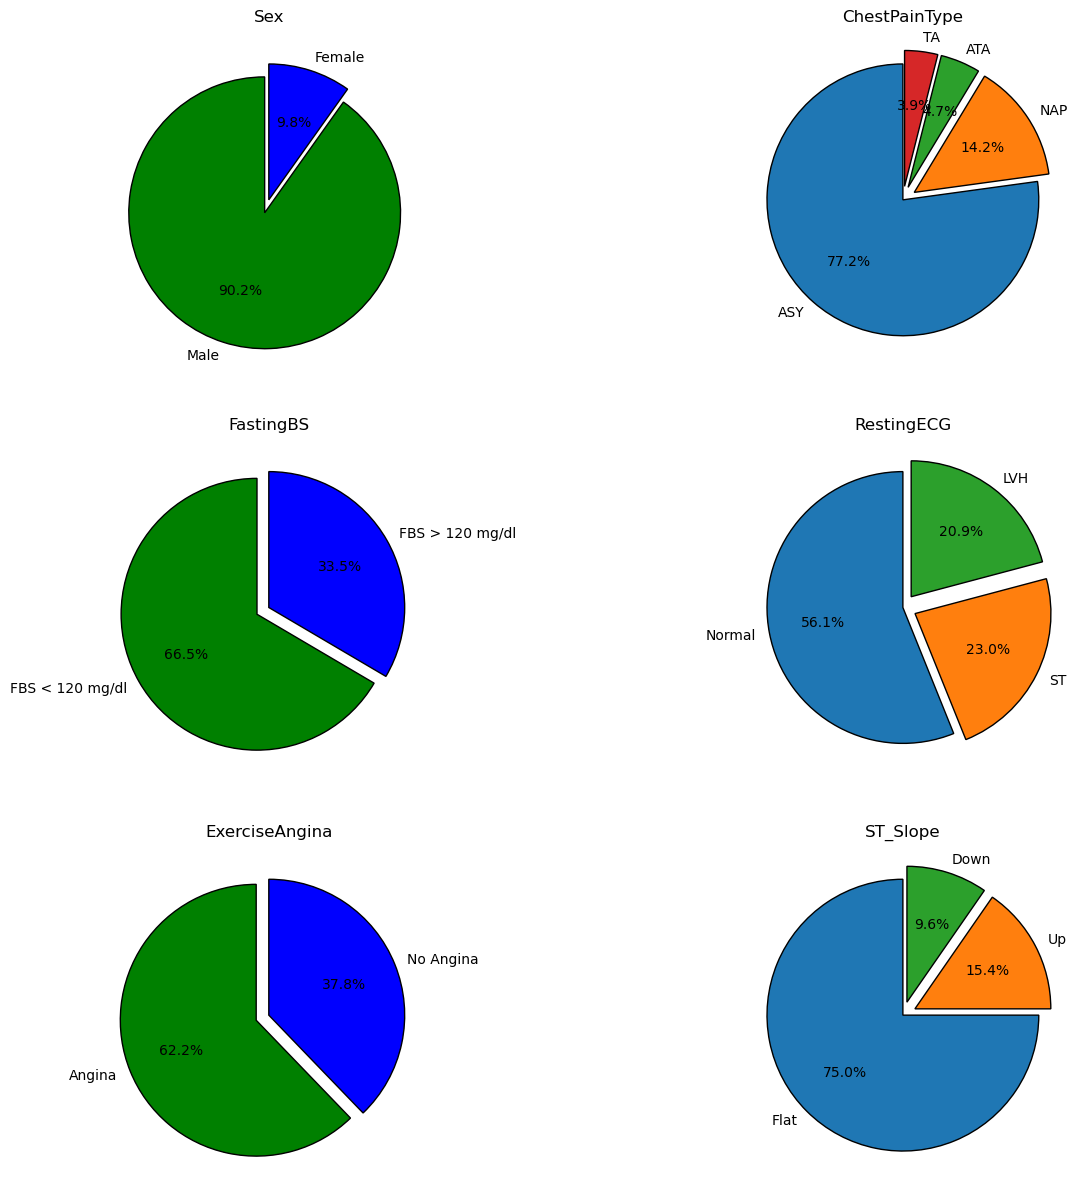

In [26]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex')

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType')

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS')


plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG')

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina')

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');


<b>Comment 5</b>: Trong số những người bị bệnh tim:
* hơn 90% là nam giới.

* Hơn 77% người thuộc loại ASY (chest pain) 

* 2/3 người có Fasting Blood Sugar level < 120 mg/dl.

* Hơn 1/2 người thuôc Normal level (For RestingECG)

* Hơn 62% Angina (Exercise Angina)

* 3/4 thuộc Flat (ST_Slope)


### 2.4. Tính correlations của HeartDisease với các features còn lại

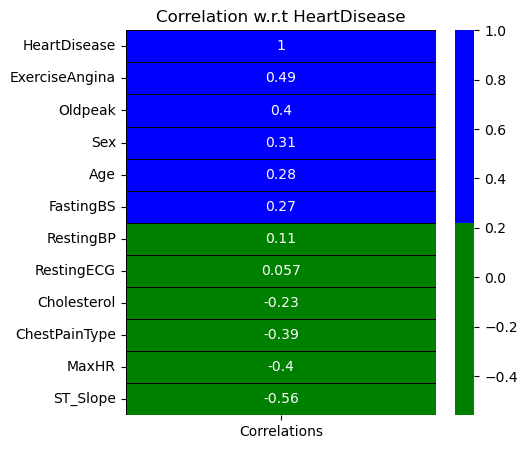

In [27]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

<b>Comment 6</b>: Nhìn vào độ tương quan của các features với heartdisease, ta thấy ResingBP và RestingECG có ít tương quan với HeartDisease so với các features khác. Do đó ta quyết định bỏ 2 đặt trưng này ra khỏi dataset.

## 3.Features engineering

### 3.1. Bỏ 2 đặc trưng RestingBP và RestingECG

In [28]:
df = pd.read_csv('heart.csv')

In [29]:
df = df[df.columns.drop(['RestingBP','RestingECG'])]

In [30]:
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [31]:
df.head()

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,289,0,172,0,0.00,2,0
1,49,0,2,180,0,156,0,1.00,1,1
2,37,1,1,283,0,98,0,0.00,2,0
3,48,0,0,214,0,108,1,1.50,1,1
4,54,1,2,195,0,122,0,0.00,2,0


### 3.2. Data scaling

In [32]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])
df['Age'] = ss.fit_transform(df[['Age']])
df['Cholesterol'] = ss.fit_transform(df[['Cholesterol']])
df['MaxHR'] = ss.fit_transform(df[['MaxHR']])
df.head()

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.83,0,1.38,0,0.30,2,0
1,-0.48,0,2,-0.17,0,0.75,0,0.41,1,1
2,-1.75,1,1,0.77,0,-1.53,0,0.30,2,0
3,-0.58,0,0,0.14,0,-1.13,1,0.47,1,1
4,0.05,1,2,-0.03,0,-0.58,0,0.30,2,0


# MODEL

## Logistic Regression

###  Modeling and evaluating

In [140]:
def cross_validation_eval(model, X, y, kf):
    metrics = []
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model_ = model
        hist = model_.fit(X_train, y_train)

        predict = model_.predict(X_test)

        metrics.append([accuracy_score(y_test, predict), 
                        precision_score(y_test, predict, average='macro'), 
                        recall_score(y_test, predict, average='macro'), 
                        f1_score(y_test, predict, average='macro')])
    return metrics

In [141]:
data = df.values

X = data[:, :-1]
y = data[:, -1]

In [142]:
scaler = StandardScaler().fit(X)
X_ = scaler.transform(X)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_, y, test_size=0.3, random_state=10)

In [143]:
print(np.unique(y_train1, return_counts=True))

(array([0., 1.]), array([283, 359], dtype=int64))


### GridSearch

In [144]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

In [145]:
search_for_best = GridSearchCV(estimator = LogisticRegression(), 
                              param_grid = param_grid,
                              scoring = 'accuracy')
search_for_best.fit(X_train1, y_train1)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [146]:
search_for_best.best_params_

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [147]:
search_for_best.best_score_

0.8582848837209301

### Đánh giá lại mô hình

In [148]:
kf = KFold(n_splits=5)

In [149]:
start= time.time()
metrics= cross_validation_eval(search_for_best.best_estimator_, X_, y, kf)
end= time.time()

print(f"Execution time: {end-start}s")

Execution time: 0.035683631896972656s


In [150]:
lr_evaluation = pd.DataFrame(
    [np.mean(metrics, axis=0)],
    columns = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
)
lr_evaluation

,Accuracy,Precision,Recall,F1_Score
0,0.84,0.82,0.82,0.82


## ANN

In [ ]:
# Build model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

### Modeling and evaluating

In [151]:
data = df.values

X = data[:, :-1]
y = data[:, -1]

In [152]:
data

array([[-1.4331398 ,  1.        ,  1.        , ...,  0.29545455,
         2.        ,  0.        ],
       [-0.47848359,  0.        ,  2.        , ...,  0.40909091,
         1.        ,  1.        ],
       [-1.75135854,  1.        ,  1.        , ...,  0.29545455,
         2.        ,  0.        ],
       ...,
       [ 0.37009972,  1.        ,  0.        , ...,  0.43181818,
         1.        ,  1.        ],
       [ 0.37009972,  0.        ,  1.        , ...,  0.29545455,
         1.        ,  1.        ],
       [-1.64528563,  1.        ,  2.        , ...,  0.29545455,
         2.        ,  0.        ]])

In [153]:
kf = KFold(n_splits=5)

### **6 - 6**

In [154]:

# Initializing the ANN
classifier = Sequential()
# Adding the Input layer and the First Hidden Layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu',input_dim=X.shape[1]))
# Adding the Second Hidden Layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [155]:
classifier.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 6)                 60        
                                                                 
 dense_34 (Dense)            (None, 6)                 42        
                                                                 
 dense_35 (Dense)            (None, 1)                 7         
                                                                 
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


In [156]:
X

array([[-1.4331398 ,  1.        ,  1.        , ...,  0.        ,
         0.29545455,  2.        ],
       [-0.47848359,  0.        ,  2.        , ...,  0.        ,
         0.40909091,  1.        ],
       [-1.75135854,  1.        ,  1.        , ...,  0.        ,
         0.29545455,  2.        ],
       ...,
       [ 0.37009972,  1.        ,  0.        , ...,  1.        ,
         0.43181818,  1.        ],
       [ 0.37009972,  0.        ,  1.        , ...,  0.        ,
         0.29545455,  1.        ],
       [-1.64528563,  1.        ,  2.        , ...,  0.        ,
         0.29545455,  2.        ]])

In [157]:
metrics = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 1. chuẩn hóa dữ liệu
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # 2. Train model
    model_history = classifier.fit(X_train,y_train,batch_size=10,epochs = 100)
    
    # 3. predict model
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred > 0.5)
    # 4. Đánh giá model
    metrics.append([accuracy_score(y_test, y_pred), 
                    precision_score(y_test, y_pred, average='macro'), 
                    recall_score(y_test, y_pred, average='macro'), 
                    f1_score(y_test, y_pred, average='macro')])

Epoch 1/100
74/74 [==============================] - 1s 1ms/step - loss: 0.5974 - accuracy: 0.6349
Epoch 2/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.7452
Epoch 3/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5221 - accuracy: 0.7984
Epoch 4/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.8202
Epoch 5/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.8229
Epoch 6/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8270
Epoch 7/100
74/74 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.8202
Epoch 8/100
74/74 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.8297
Epoch 9/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8270
Epoch 10/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8283
Epoch 11/

In [158]:
# Tính trung bình các metrics
print('Model acc: %.2f'%(mean([x[0] for x in metrics]) * 100))
print('Model precision: %.2f'%(mean([x[1] for x in metrics]) * 100))
print('Model recall: %.2f'%(mean([x[2] for x in metrics]) * 100))
print('Model f1_score: %.2f'%(mean([x[3] for x in metrics]) * 100))

Model acc: 84.85
Model precision: 83.67
Model recall: 83.10
Model f1_score: 83.34


### **6 - 10**

In [159]:
# Initializing the ANN
classifier = Sequential()
# Adding the Input layer and the First Hidden Layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu',input_dim=X.shape[1]))
# Adding the Second Hidden Layer
classifier.add(Dense(units=10,kernel_initializer='glorot_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units=1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [160]:
metrics = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 1. chuẩn hóa dữ liệu
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # 2. Train model
    model_history = classifier.fit(X_train,y_train,batch_size=10,epochs = 100)
    # 3. predict model
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred > 0.5)
    # 4. Đánh giá model
    metrics.append([accuracy_score(y_test, y_pred), 
                    precision_score(y_test, y_pred, average='macro'), 
                    recall_score(y_test, y_pred, average='macro'), 
                    f1_score(y_test, y_pred, average='macro')])

Epoch 1/100
74/74 [==============================] - 1s 1ms/step - loss: 0.7475 - accuracy: 0.5068
Epoch 2/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.5981
Epoch 3/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5761 - accuracy: 0.6921
Epoch 4/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5284 - accuracy: 0.7902
Epoch 5/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.8038
Epoch 6/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.8052
Epoch 7/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.8134
Epoch 8/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8134
Epoch 9/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8147
Epoch 10/100
74/74 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8229
Epoch 11/

In [161]:
# Tính trung bình các metrics
print('Model acc: %.2f'%(mean([x[0] for x in metrics]) * 100))
print('Model precision: %.2f'%(mean([x[1] for x in metrics]) * 100))
print('Model recall: %.2f'%(mean([x[2] for x in metrics]) * 100))
print('Model f1_score: %.2f'%(mean([x[3] for x in metrics]) * 100))

Model acc: 84.85
Model precision: 83.22
Model recall: 82.64
Model f1_score: 82.85


### **6-15**

In [162]:
# Initializing the ANN
classifier = Sequential()
# Adding the Input layer and the First Hidden Layer
classifier.add(Dense(units=6, kernel_initializer='glorot_uniform',activation='relu',input_dim=X.shape[1]))
# Adding the Second Hidden Layer
classifier.add(Dense(units=15, kernel_initializer='glorot_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [163]:
metrics = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 1. chuẩn hóa dữ liệu
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # 2. Train model
    model_history = classifier.fit(X_train,y_train,batch_size=10,epochs = 100)
    # 3. predict model
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred > 0.5)
    # 4. Đánh giá model
    metrics.append([accuracy_score(y_test, y_pred), 
                    precision_score(y_test, y_pred, average='macro'), 
                    recall_score(y_test, y_pred, average='macro'), 
                    f1_score(y_test, y_pred, average='macro')])

Epoch 1/100
74/74 [==============================] - 1s 1ms/step - loss: 0.6105 - accuracy: 0.6022
Epoch 2/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5783 - accuracy: 0.6608
Epoch 3/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5483 - accuracy: 0.7221
Epoch 4/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.7738
Epoch 5/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.7725
Epoch 6/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4831 - accuracy: 0.7875
Epoch 7/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.7984
Epoch 8/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4526 - accuracy: 0.7970
Epoch 9/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8038
Epoch 10/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8093
Epoch 11/

In [164]:
# Tính trung bình các metrics
print('Model acc: %.2f'%(mean([x[0] for x in metrics]) * 100))
print('Model precision: %.2f'%(mean([x[1] for x in metrics]) * 100))
print('Model recall: %.2f'%(mean([x[2] for x in metrics]) * 100))
print('Model f1_score: %.2f'%(mean([x[3] for x in metrics]) * 100))

Model acc: 83.97
Model precision: 83.04
Model recall: 81.44
Model f1_score: 82.03


### **6-10-10**

In [165]:
# Initializing the ANN
classifier = Sequential()
# Adding the Input layer and the First Hidden Layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu',input_dim=X.shape[1]))
# Adding the Second Hidden Layer
classifier.add(Dense(units=10,kernel_initializer='glorot_uniform',activation='relu'))
# Adding the Third Hidden Layer
classifier.add(Dense(units=10,kernel_initializer='glorot_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [166]:
metrics = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 1. chuẩn hóa dữ liệu
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # 2. Train model
    model_history = classifier.fit(X_train,y_train,batch_size=10,epochs = 100)
    # 3. predict model
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred > 0.5)
    # 4. Đánh giá model
    metrics.append([accuracy_score(y_test, y_pred), 
                    precision_score(y_test, y_pred, average='macro'), 
                    recall_score(y_test, y_pred, average='macro'), 
                    f1_score(y_test, y_pred, average='macro')])

Epoch 1/100
74/74 [==============================] - 1s 1ms/step - loss: 0.6868 - accuracy: 0.5381
Epoch 2/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6530 - accuracy: 0.5981
Epoch 3/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5916 - accuracy: 0.6431
Epoch 4/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4773 - accuracy: 0.8229
Epoch 5/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8447
Epoch 6/100
74/74 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8406
Epoch 7/100
74/74 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8351
Epoch 8/100
74/74 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.8365
Epoch 9/100
74/74 [==============================] - 0s 1ms/step - loss: 0.3854 - accuracy: 0.8420
Epoch 10/100
74/74 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8379
Epoch 11/

In [167]:
# Tính trung bình các metrics
print('Model acc: %.2f'%(mean([x[0] for x in metrics]) * 100))
print('Model precision: %.2f'%(mean([x[1] for x in metrics]) * 100))
print('Model recall: %.2f'%(mean([x[2] for x in metrics]) * 100))
print('Model f1_score: %.2f'%(mean([x[3] for x in metrics]) * 100))

Model acc: 85.94
Model precision: 84.45
Model recall: 83.81
Model f1_score: 84.09


### **6**

In [168]:
# Initializing the ANN
classifier = Sequential()
# Adding the Input layer and the First Hidden Layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu',input_dim=X.shape[1]))
# Adding the output layer
classifier.add(Dense(units = 1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [169]:
metrics = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 1. chuẩn hóa dữ liệu
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # 2. Train model
    model_history = classifier.fit(X_train,y_train,batch_size=10,epochs = 100)
    # 3. predict model
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred > 0.5)
    # 4. Đánh giá model
    metrics.append([accuracy_score(y_test, y_pred), 
                    precision_score(y_test, y_pred, average='macro'), 
                    recall_score(y_test, y_pred, average='macro'), 
                    f1_score(y_test, y_pred, average='macro')])

Epoch 1/100
74/74 [==============================] - 1s 1ms/step - loss: 0.6207 - accuracy: 0.7929
Epoch 2/100
74/74 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.8202
Epoch 3/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5249 - accuracy: 0.8283
Epoch 4/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4942 - accuracy: 0.8256
Epoch 5/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.8243
Epoch 6/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.8297
Epoch 7/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.8229
Epoch 8/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8270
Epoch 9/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8256
Epoch 10/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8256
Epoch 11/

In [170]:
# Tính trung bình các metrics
print('Model acc: %.2f'%(mean([x[0] for x in metrics]) * 100))
print('Model precision: %.2f'%(mean([x[1] for x in metrics]) * 100))
print('Model recall: %.2f'%(mean([x[2] for x in metrics]) * 100))
print('Model f1_score: %.2f'%(mean([x[3] for x in metrics]) * 100))

Model acc: 84.30
Model precision: 83.06
Model recall: 82.01
Model f1_score: 82.46


### **6-6-10**

In [171]:
# Initializing the ANN
classifier = Sequential()
# Adding the Input layer and the First Hidden Layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu',input_dim=X.shape[1]))
# Adding the Second Hidden Layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu'))
# Adding the Third Hidden Layer
classifier.add(Dense(units=10,kernel_initializer='glorot_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [172]:
metrics = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 1. chuẩn hóa dữ liệu
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # 2. Train model
    model_history = classifier.fit(X_train,y_train,batch_size=10,epochs = 100)
    # 3. predict model
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred > 0.5)
    # 4. Đánh giá model
    metrics.append([accuracy_score(y_test, y_pred), 
                    precision_score(y_test, y_pred, average='macro'), 
                    recall_score(y_test, y_pred, average='macro'), 
                    f1_score(y_test, y_pred, average='macro')])

Epoch 1/100
74/74 [==============================] - 1s 1ms/step - loss: 0.6875 - accuracy: 0.5967
Epoch 2/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.7520
Epoch 3/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5738 - accuracy: 0.7970
Epoch 4/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5096 - accuracy: 0.7943
Epoch 5/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.8120
Epoch 6/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8134
Epoch 7/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8174
Epoch 8/100
74/74 [==============================] - 0s 1ms/step - loss: 0.3912 - accuracy: 0.8311
Epoch 9/100
74/74 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8324
Epoch 10/100
74/74 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8351
Epoch 11/

In [173]:
# Tính trung bình các metrics
print('Model acc: %.2f'%(mean([x[0] for x in metrics]) * 100))
print('Model precision: %.2f'%(mean([x[1] for x in metrics]) * 100))
print('Model recall: %.2f'%(mean([x[2] for x in metrics]) * 100))
print('Model f1_score: %.2f'%(mean([x[3] for x in metrics]) * 100))

Model acc: 85.50
Model precision: 83.73
Model recall: 84.10
Model f1_score: 83.88


### **6-10-10-10**

In [174]:
# Initializing the ANN
classifier = Sequential()
# Adding the Input layer and the First Hidden Layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu',input_dim=X.shape[1]))
# Adding the Second Hidden Layer
classifier.add(Dense(units=10,kernel_initializer='glorot_uniform',activation='relu'))
# Adding the Third Hidden Layer
classifier.add(Dense(units=10,kernel_initializer='glorot_uniform',activation='relu'))
# Adding the Fouth Hidden Layer
classifier.add(Dense(units=10,kernel_initializer='glorot_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [175]:
metrics = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 1. chuẩn hóa dữ liệu
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # 2. Train model
    model_history = classifier.fit(X_train,y_train,batch_size=10,epochs = 100)
    # 3. predict model
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred > 0.5)
    # 4. Đánh giá model
    metrics.append([accuracy_score(y_test, y_pred), 
                    precision_score(y_test, y_pred, average='macro'), 
                    recall_score(y_test, y_pred, average='macro'), 
                    f1_score(y_test, y_pred, average='macro')])

Epoch 1/100
74/74 [==============================] - 1s 1ms/step - loss: 0.6848 - accuracy: 0.5749
Epoch 2/100
74/74 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.6540
Epoch 3/100
74/74 [==============================] - 0s 2ms/step - loss: 0.5713 - accuracy: 0.7602
Epoch 4/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.8065
Epoch 5/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.8202
Epoch 6/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8229
Epoch 7/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8270
Epoch 8/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8283
Epoch 9/100
74/74 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8256
Epoch 10/100
74/74 [==============================] - 0s 1ms/step - loss: 0.3897 - accuracy: 0.8311
Epoch 11/

In [176]:
# Tính trung bình các metrics
print('Model acc: %.2f'%(mean([x[0] for x in metrics]) * 100))
print('Model precision: %.2f'%(mean([x[1] for x in metrics]) * 100))
print('Model recall: %.2f'%(mean([x[2] for x in metrics]) * 100))
print('Model f1_score: %.2f'%(mean([x[3] for x in metrics]) * 100))

Model acc: 84.96
Model precision: 83.79
Model recall: 83.18
Model f1_score: 83.36


### **6 - 6 - sigmoid**

In [177]:
# Initializing the ANN
classifier = Sequential()
# Adding the Input layer and the First Hidden Layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='sigmoid',input_dim=X.shape[1]))
# Adding the Second Hidden Layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='sigmoid'))
# Adding the output layer
classifier.add(Dense(units = 1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [178]:
classifier.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 6)                 60        
                                                                 
 dense_58 (Dense)            (None, 6)                 42        
                                                                 
 dense_59 (Dense)            (None, 1)                 7         
                                                                 
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


In [179]:
metrics = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 1. chuẩn hóa dữ liệu
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # 2. Train model
    model_history = classifier.fit(X_train,y_train,batch_size=10,epochs = 100)
    # 3. predict model
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred > 0.5)
    # 4. Đánh giá model
    metrics.append([accuracy_score(y_test, y_pred), 
                    precision_score(y_test, y_pred, average='macro'), 
                    recall_score(y_test, y_pred, average='macro'), 
                    f1_score(y_test, y_pred, average='macro')])

Epoch 1/100
74/74 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.5327
Epoch 2/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6751 - accuracy: 0.5981
Epoch 3/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.5981
Epoch 4/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.5981
Epoch 5/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.5981
Epoch 6/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6531 - accuracy: 0.5981
Epoch 7/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6451 - accuracy: 0.5981
Epoch 8/100
74/74 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.5981
Epoch 9/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6236 - accuracy: 0.5981
Epoch 10/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.6117
Epoch 11/

In [180]:
# Tính trung bình các metrics
print('Model acc: %.2f'%(mean([x[0] for x in metrics]) * 100))
print('Model precision: %.2f'%(mean([x[1] for x in metrics]) * 100))
print('Model recall: %.2f'%(mean([x[2] for x in metrics]) * 100))
print('Model f1_score: %.2f'%(mean([x[3] for x in metrics]) * 100))

Model acc: 83.98
Model precision: 82.68
Model recall: 81.64
Model f1_score: 82.05


### **6 - 10 - sigmoid**

In [181]:
# Initializing the ANN
classifier = Sequential()
# Adding the Input layer and the First Hidden Layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='sigmoid',input_dim=X.shape[1]))
# Adding the Second Hidden Layer
classifier.add(Dense(units=10,kernel_initializer='glorot_uniform',activation='sigmoid'))
# Adding the output layer
classifier.add(Dense(units = 1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [182]:
metrics = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 1. chuẩn hóa dữ liệu
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # 2. Train model
    model_history = classifier.fit(X_train,y_train,batch_size=10,epochs = 100)
    # 3. predict model
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred > 0.5)
    # 4. Đánh giá model
    metrics.append([accuracy_score(y_test, y_pred), 
                    precision_score(y_test, y_pred, average='macro'), 
                    recall_score(y_test, y_pred, average='macro'), 
                    f1_score(y_test, y_pred, average='macro')])

Epoch 1/100
74/74 [==============================] - 1s 1ms/step - loss: 0.6841 - accuracy: 0.5981
Epoch 2/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6660 - accuracy: 0.5981
Epoch 3/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.5981
Epoch 4/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.5981
Epoch 5/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.5981
Epoch 6/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6235 - accuracy: 0.5981
Epoch 7/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6065 - accuracy: 0.5981
Epoch 8/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.6390
Epoch 9/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5665 - accuracy: 0.7044
Epoch 10/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5443 - accuracy: 0.7670
Epoch 11/

In [183]:
# Tính trung bình các metrics
print('Model acc: %.2f'%(mean([x[0] for x in metrics]) * 100))
print('Model precision: %.2f'%(mean([x[1] for x in metrics]) * 100))
print('Model recall: %.2f'%(mean([x[2] for x in metrics]) * 100))
print('Model f1_score: %.2f'%(mean([x[3] for x in metrics]) * 100))

Model acc: 83.98
Model precision: 82.82
Model recall: 81.67
Model f1_score: 82.10


## Adaboost

In [33]:
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.ensemble import AdaBoostClassifier

### Modeling and evaluating

In [34]:
data = df.values

X = data[:, :-1]
y = data[:, -1]

In [35]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=10)

In [36]:
print(np.unique(y_train1, return_counts=True))

(array([0., 1.]), array([283, 359], dtype=int64))


In [37]:
kf = KFold(n_splits=5)

In [39]:
def Val(model,X,y,kf):
  metrics = []
  for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      # 1. chuẩn hóa dữ liệu
      scaler = StandardScaler().fit(X_train)
      X_train = scaler.transform(X_train)
      X_test = scaler.transform(X_test)

      # 2. Train model
      
      start= time.time()
      model = model.fit(X_train,y_train)
      end= time.time()
      # 4. predict model
      probs = model.predict_proba(X_test)
      predict = (probs[:, 1] > 0.5).astype(int)
      
      # 3. Đánh giá model

      metrics.append([accuracy_score(y_test, predict), 
                      precision_score(y_test, predict, average='macro'), 
                      recall_score(y_test, predict, average='macro'), 
                      f1_score(y_test, predict, average='macro'),
                      end-start])
      return metrics, model

### Parameters

In [189]:
number_of_boosting_stages = [1, 10, 50, 100, 500]
learning_rate = [0.01, 0.1, 0.5, 1]

### AdaBoost với DecisionTree

In [190]:
scaler = StandardScaler().fit(X)
X_1 = scaler.transform(X)

search_for_best = GridSearchCV(estimator = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),random_state=10), 
                              param_grid = [{
                                  " " : ["gini", "entropy"],
                                  'learning_rate': learning_rate
                              }],
                              scoring = 'accuracy')
search_for_best.fit(X_1, y)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=10),
             param_grid=[{'base_estimator__criterion': ['gini', 'entropy'],
                          'learning_rate': [0.01, 0.1, 0.5, 1]}],
             scoring='accuracy')

In [191]:
search_for_best.best_params_

{'base_estimator__criterion': 'gini', 'learning_rate': 0.1}

Chọn 'gini' là cách tìm thuộc tính chọn node trong cây, learning rate của Ada là 0.1

In [192]:
metrics_tree = []
for i in number_of_boosting_stages:
    model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=1),random_state=1, learning_rate=0.1, n_estimators=i)
    metrics_tree.append(Val(model,X,y,kf))

In [193]:
metrics = np.array(metrics_tree)
df = pd.DataFrame(
    np.array(metrics[:,0]), 
    index = number_of_boosting_stages, 
    columns = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'Time']
)
df

,Accuracy,Precision,Recall,F1_Score,Time
1,0.93,0.92,0.94,0.93,0.00
10,0.92,0.92,0.94,0.92,0.02
50,0.90,0.89,0.90,0.90,0.07
100,0.89,0.88,0.88,0.88,0.16
500,0.88,0.87,0.87,0.87,0.73


### AdaBoost với SVM

In [194]:
search_for_best = GridSearchCV(estimator = AdaBoostClassifier(base_estimator=SVC(),random_state=10), 
                              param_grid = [{
                                  "base_estimator__probability" : [True],
                                  'base_estimator__kernel': ['linear', 'sigmoid', 'rbf'],
                                  'learning_rate': learning_rate
                              }],
                              scoring = 'accuracy')
search_for_best.fit(X_1, y)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=SVC(),
                                          random_state=10),
             param_grid=[{'base_estimator__kernel': ['linear', 'sigmoid',
                                                     'rbf'],
                          'base_estimator__probability': [True],
                          'learning_rate': [0.01, 0.1, 0.5, 1]}],
             scoring='accuracy')

In [195]:
search_for_best.best_params_

{'base_estimator__kernel': 'rbf',
 'base_estimator__probability': True,
 'learning_rate': 0.1}

In [196]:
search_for_best.best_score_

0.8376098835827988

In [197]:
metrics_svc = []
for i in number_of_boosting_stages:
  model = AdaBoostClassifier(SVC(probability=True, kernel='rbf'),random_state=10, n_estimators = i, learning_rate=0.1)
  metrics_svc.append(Val(model,X,y,kf))

In [198]:
metrics_svc = np.array(metrics_svc)
df_svc = pd.DataFrame(
    np.array(metrics_svc[:,0]), 
    index = number_of_boosting_stages, 
    columns = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'Time']
)
df_svc

,Accuracy,Precision,Recall,F1_Score,Time
1,0.84,0.84,0.82,0.83,0.12
10,0.88,0.87,0.87,0.87,1.15
50,0.89,0.88,0.89,0.88,6.50
100,0.89,0.88,0.89,0.89,13.79
500,0.38,0.19,0.50,0.27,57.52


### Tìm thuộc tính có tính phân loại tốt nhất

In [48]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=1)
a, dt1 = Val(dt, X, y, kf)
dt1.feature_importances_
all_columns = X[:,:]
importance = dt1.feature_importances_
sorted_indices = importance.argsort()[::-1]  # Sắp xếp theo giá trị quan trọng giảm dần

top_feature = sorted_indices[0]  # Lấy thuộc tính có giá trị quan trọng cao nhất
feature_name = df.columns[top_feature]

print("Tên thuộc tính tốt nhất:", feature_name)


Tên thuộc tính tốt nhất: ST_Slope
